In [1]:
# Initial imports
import tensorflow as tf
import pandas as pd
from pathlib import Path
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Set the random seed for reproducibility

from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [3]:
file_path = Path("tsla.csv")
tsla_df = pd.read_csv(file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
tsla_df.drop(inplace=True, columns=["Down", "RSI(14)"])
tsla_df.dropna(inplace=True)
tsla_df.sort_index(inplace=True)
tsla_df.head(30)

,Open,High,Low,Close,Volume,Up
Date,,,,,,
2010-06-29,3.800,5.00000,3.50800,4.778,93863235,93863235.0
2010-06-30,5.158,6.08384,4.66000,4.766,85945040,85945040.0
2010-07-01,5.000,5.18400,4.05400,4.392,41118695,41118695.0
2010-07-02,4.600,4.62000,3.74200,3.840,25701600,25701600.0
2010-07-06,4.000,4.00000,3.16600,3.222,34337250,34337250.0
2010-07-07,3.280,3.32600,2.99600,3.160,34608070,34608070.0
2010-07-08,3.228,3.50400,3.11400,3.492,38557745,38557745.0
2010-07-09,3.516,3.58000,3.31000,3.480,20255560,20255560.0
2010-07-12,3.590,3.61400,3.40000,3.410,11012060,11012060.0


In [4]:
tsla_df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Up        0
dtype: int64

In [5]:
def window_data(tsal_df, window, feature_col_number, target_col_number):
    
    X = []
    y = []
    for i in range(len(tsla_df) - window):
        features = tsla_df.iloc[i : (i + window), feature_col_number]
        target = tsla_df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)    

In [6]:
window_size = 5

feature_column = 3
target_column = 3
X, y = window_data(tsla_df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[4.778 4.766 4.392 3.84  3.222]
 [4.766 4.392 3.84  3.222 3.16 ]
 [4.392 3.84  3.222 3.16  3.492]
 [3.84  3.222 3.16  3.492 3.48 ]
 [3.222 3.16  3.492 3.48  3.41 ]] 

y sample values:
[[3.16 ]
 [3.492]
 [3.48 ]
 [3.41 ]
 [3.628]]


In [7]:
test_size = 30
simulation_size = 10

df_train = tsla_df.iloc[:-test_size]
df_test = tsla_df.iloc[-test_size:]
tsla_df.shape, df_train.shape, df_test.shape

((2965, 6), (2935, 6), (30, 6))

In [8]:
split = int(0.9 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [9]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the training feature data X_train
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the training target data y_train
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [10]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[1.83878263e-03]
  [1.82514518e-03]
  [1.40011137e-03]
  [7.72788745e-04]
  [7.04601502e-05]]

 [[1.82514518e-03]
  [1.40011137e-03]
  [7.72788745e-04]
  [7.04601502e-05]
  [0.00000000e+00]]

 [[1.40011137e-03]
  [7.72788745e-04]
  [7.04601502e-05]
  [0.00000000e+00]
  [3.77302740e-04]]

 [[7.72788745e-04]
  [7.04601502e-05]
  [0.00000000e+00]
  [3.77302740e-04]
  [3.63665292e-04]]

 [[7.04601502e-05]
  [0.00000000e+00]
  [3.77302740e-04]
  [3.63665292e-04]
  [2.84113509e-04]]] 

X_test sample values:
[[[0.94583649]
  [0.89821918]
  [0.95081427]
  [0.98829452]
  [0.96772471]]

 [[0.89821918]
  [0.95081427]
  [0.98829452]
  [0.96772471]
  [0.96238337]]

 [[0.95081427]
  [0.98829452]
  [0.96772471]
  [0.96238337]
  [0.96492903]]

 [[0.98829452]
  [0.96772471]
  [0.96238337]
  [0.96492903]
  [0.97764595]]

 [[0.96772471]
  [0.96238337]
  [0.96492903]
  [0.97764595]
  [0.96178105]]]


In [11]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [12]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [13]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [14]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 5)              140       
                                                                 
 dropout (Dropout)           (None, 5, 5)              0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 5)              220       
                                                                 
 dropout_1 (Dropout)         (None, 5, 5)              0         
                                                                 
 lstm_2 (LSTM)               (None, 5)                 220       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [15]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
2664/2664 [==============================] - 42s 12ms/step - loss: 7.2477e-04
Epoch 2/10
2664/2664 [==============================] - 33s 12ms/step - loss: 0.0075
Epoch 3/10
2664/2664 [==============================] - 32s 12ms/step - loss: 0.0055
Epoch 4/10
2664/2664 [==============================] - 31s 12ms/step - loss: 0.0028
Epoch 5/10
2664/2664 [==============================] - 34s 13ms/step - loss: 0.0021
Epoch 6/10
2664/2664 [==============================] - 34s 13ms/step - loss: 0.0019
Epoch 7/10
2664/2664 [==============================] - 38s 14ms/step - loss: 0.0021
Epoch 8/10
2664/2664 [==============================] - 32s 12ms/step - loss: 0.0019
Epoch 9/10
2664/2664 [==============================] - 31s 12ms/step - loss: 0.0017
Epoch 10/10
2664/2664 [==============================] - 46s 17ms/step - loss: 0.0016


In [16]:
# Evaluate the model
model.evaluate(X_test, y_test)

10/10 [==============================] - 3s 6ms/step - loss: 0.0357


0.03565908223390579

In [17]:
# Make some predictions
predicted = model.predict(X_test)

In [18]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [19]:
tsla_stock = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = tsla_df.index[-len(real_prices): ])
tsla_stock.head()

,Real,Predicted
Date,,
2021-02-04,849.99,869.132507
2021-02-05,852.23,868.648132
2021-02-08,863.42,870.754944
2021-02-09,849.46,871.550110
2021-02-10,804.82,870.929871


<AxesSubplot:xlabel='Date'>

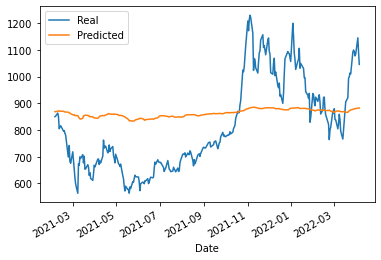

In [20]:
tsla_stock.plot()

In [21]:
tsla_stock.tail()

,Real,Predicted
Date,,
2022-03-31,1077.60,880.172302
2022-04-01,1084.59,880.817444
2022-04-04,1145.45,882.266968
2022-04-05,1091.26,882.344055
2022-04-06,1045.76,882.292053
